In [5]:
import pandas as pd
import numpy as np
import numpy.ma as ma
from plotly.offline import init_notebook_mode, iplot, plot
from plotly import graph_objs as go
import matplotlib.pyplot as plt
import plotly.offline as offline
import plotly.figure_factory as ff
from apyori import apriori

ModuleNotFoundError: No module named 'pandas'

In [292]:
init_notebook_mode(connected=True)

In [293]:
quest = pd.read_csv("series.csv")
quest.head()
quest.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16'],
      dtype='object')

In [271]:
# a = [[1,2],[1,2],[3,4,5],[3,4,5],[3,4,5]]
# b_set = set(tuple(x) for x in a)
# b = [ list(x) for x in b_set ]

In [272]:
def match_patterns(data):
    data = data.values.tolist()
    b_set = set(tuple(x) for x in data)
    b = [list(x) for x in b_set]
    c = b.sort(key = lambda x: data.index(x) )

    if len(b) == len(b_set):
        print("No Identical Lists are present")
    else:
        print("Identical lists are present")
    return c

In [273]:
match_patterns(quest)

No Identical Lists are present


In [274]:
# quest.describe().T
# (quest["16"] != 0).sum()
# for i in range(17):
#     print (i,quest.loc[(quest[str(i)] != 0)].shape[0])

### DISTRIBUTION OF MEAN COLUMNWISE

In [275]:
def avg_exc_zero(quest_data):
    A = np.array(quest_data)
    A = A.astype(float)
    res = np.nanmean(ma.masked_where(A == 0, A), axis=0).data
    res = res.tolist()
    hist_data = [res]
    group_labels = ['Mean Curve']
    colors = ['#333F44']
    fig = ff.create_distplot(hist_data, group_labels, show_hist=False, colors=colors)
    fig['layout'].update(title='Column Mean Distribution')
    figure = iplot(fig)
    return figure

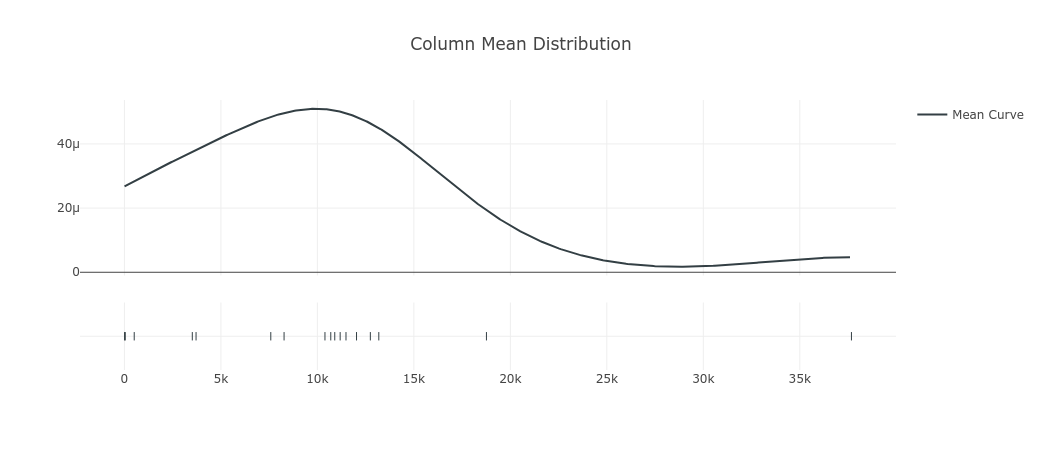

In [276]:
avg_exc_zero(quest)

### DISTRIBUTION OF MEAN ROWWISE

In [277]:
def avg_row_exc_zero(quest_data):
    A = np.array(quest_data)
    A = A.astype(float)
    res = np.nanmean(ma.masked_where(A == 0, A), axis=1).data
    res = res.tolist()
#   res = [ '%.2f' % elem for elem in res ]
    hist_data = [res]
    group_labels = ['Mean Curve']
    colors = ['#37AA9C']
    fig = ff.create_distplot(hist_data, group_labels, show_hist=False, colors=colors)
    fig['layout'].update(title=' Row Mean Distribution ')
    figure = iplot(fig)
    return figure

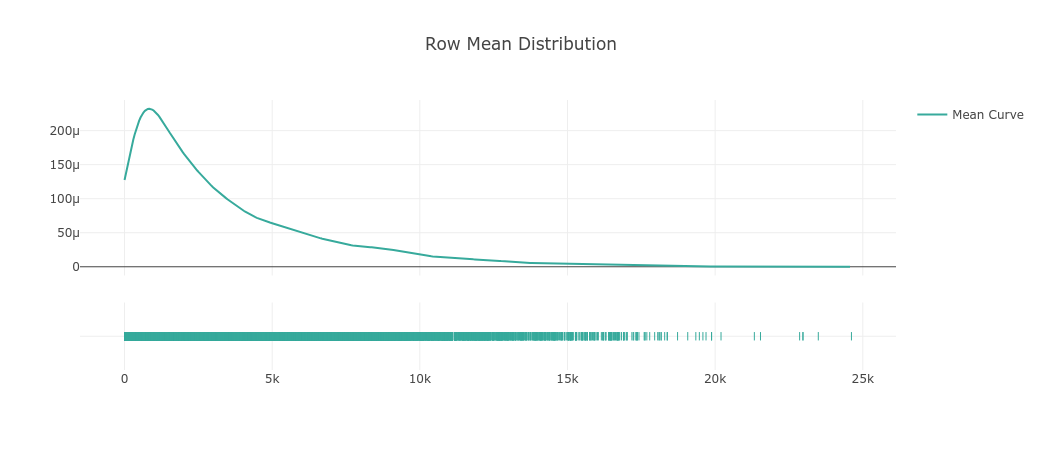

In [278]:
avg_row_exc_zero(quest)

### COLUMN-WISE P2P DISTRIBUTION

In [279]:
def peak_peak(quest_data):
    A = np.array(quest_data)
    A = A.astype(float)
    B=A.T
    a=np.ptp(B,axis=0)
    a = a.tolist()
    hist_data = [a]
    group_labels = ['Peak to Peak  Curve']
    colors = ['#37AA9C']
    fig = ff.create_distplot(hist_data, group_labels, show_hist=False, colors=colors)
    fig['layout'].update(title=' Columnwise PTP Distributions ')
    figure = iplot(fig)
    return figure

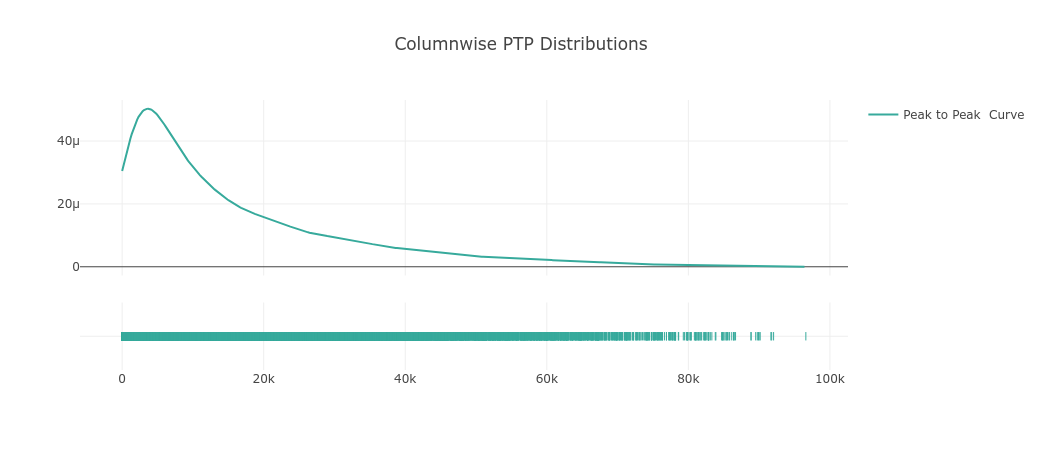

In [280]:
peak_peak(quest)

### ROW-WISE P2P DISTRIBUTION

In [281]:
def peak_peak2(quest_data):
    A = np.array(quest_data)
    A = A.astype(float)
    B=A.T
    a=np.ptp(B,axis=1)
    a = a.tolist()
    hist_data = [a]
    group_labels = ['Peak to Peak  Curve']
    colors = ['#37AA9C']
    fig = ff.create_distplot(hist_data, group_labels, show_hist=False, colors=colors)
    fig['layout'].update(title='Row-wise PTP Distributions ')
    figure = iplot(fig)
    return figure

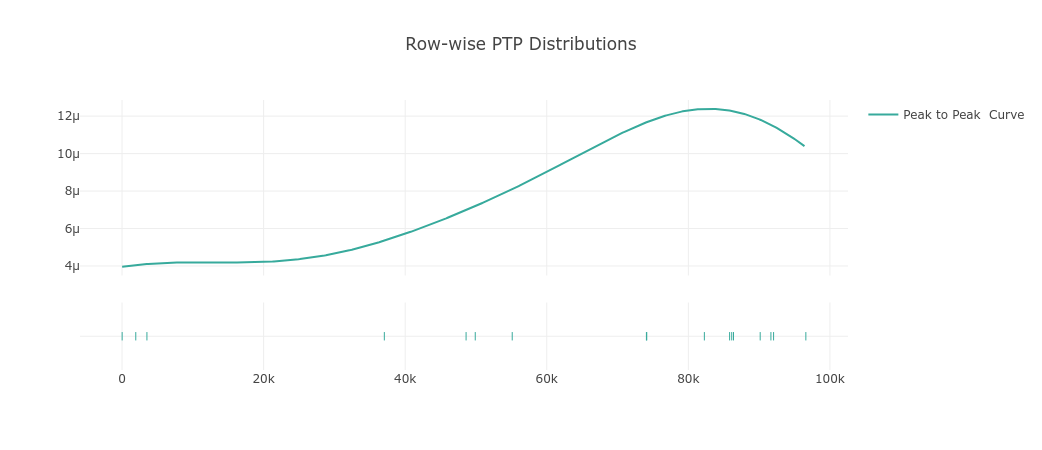

In [282]:
peak_peak2(quest)

In [298]:
def var_col(quest_data):
    A = np.array(quest_data)
    A = A.astype(float)
    B=A.T
    a=np.var(B,axis=0)
    a = a.tolist()
    hist_data = [a]
    group_labels = ['Variance Distribution Curve']
    colors = ['#37AA9C']
    fig = ff.create_distplot(hist_data, group_labels, show_hist=False, colors=colors)
    fig['layout'].update(title='ColumnWise Variance Distributions ')
    figure = iplot(fig)
    return figure

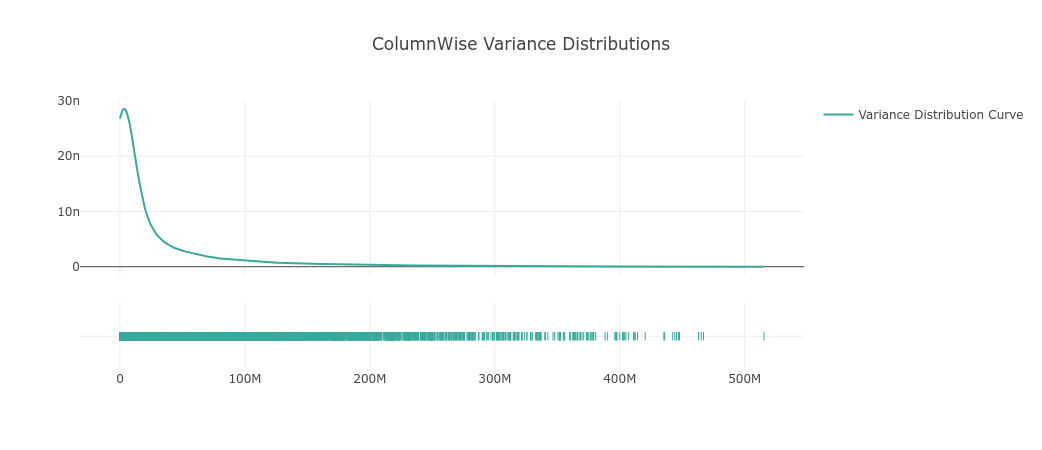

In [299]:
var_col(quest)

In [300]:
def var_row(quest_data):
    A = np.array(quest_data)
    A = A.astype(float)
    B=A.T
    a=np.var(B,axis=1)
    a = a.tolist()
    hist_data = [a]
    group_labels = ['Variance Distribution Curve']
    colors = ['#37AA9C']
    fig = ff.create_distplot(hist_data, group_labels, show_hist=False, colors=colors)
    fig['layout'].update(title='Row-wise Variance Distributions ')
    figure = iplot(fig)
    return figure

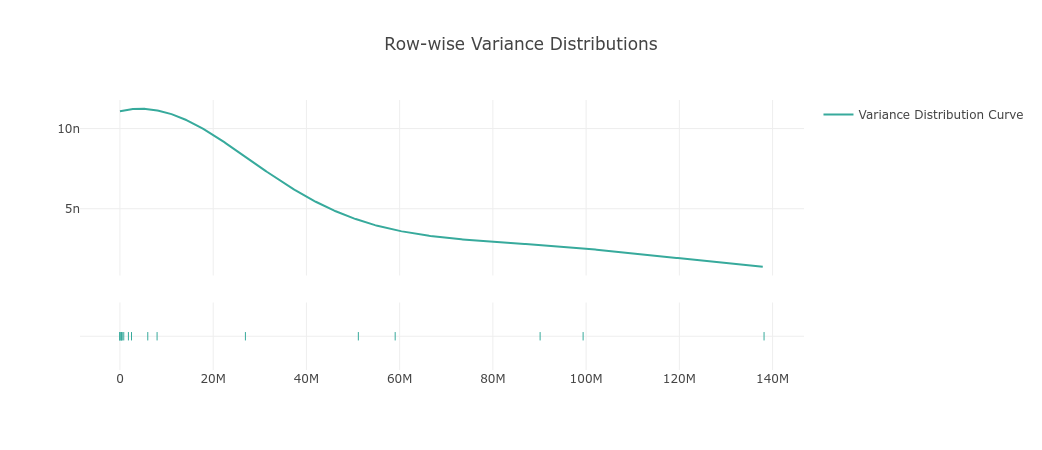

In [301]:
var_row(quest)

### Frequent Pattern Mining

In [318]:
# quest = pd.read_csv("series.csv")

In [344]:
def frequent_patterns(data):
    records = []  
    for i in range(0,len(data)):  
        records.append([str(data.values[i,j]) for j in range(0, 17)])
    association_rules = apriori(records, min_support=0.0045, min_confidence=0.2, min_lift=3, min_length=2)  
    association_results = list(association_rules)
    for i in range(len(association_results)):
        print(association_results[i])
        print("=====================================")
    for item in association_results:
        pair = item[0] 
        items = [x for x in pair]
        print("Rule: " + items[0] + " -> " + items[1])
        print("Support: " + str(item[1]))
        print("Confidence: " + str(item[2][0][2]))
        print("Lift: " + str(item[2][0][3]))
        print("=====================================")

In [345]:
frequent_patterns(quest)

RelationRecord(items=frozenset({'14', '7', '1'}), support=0.00940584222030867, ordered_statistics=[OrderedStatistic(items_base=frozenset({'14', '1'}), items_add=frozenset({'7'}), confidence=0.6513761467889908, lift=3.1488394774490533), OrderedStatistic(items_base=frozenset({'7', '1'}), items_add=frozenset({'14'}), confidence=0.2897959183673469, lift=6.804119719427428), OrderedStatistic(items_base=frozenset({'14', '7'}), items_add=frozenset({'1'}), confidence=0.5991561181434598, lift=3.318217137054957)])
RelationRecord(items=frozenset({'8', '16', '1'}), support=0.007683645757435252, ordered_statistics=[OrderedStatistic(items_base=frozenset({'16', '1'}), items_add=frozenset({'8'}), confidence=0.7341772151898734, lift=4.7407499648081775), OrderedStatistic(items_base=frozenset({'8', '1'}), items_add=frozenset({'16'}), confidence=0.3879598662207358, lift=15.70249356658029), OrderedStatistic(items_base=frozenset({'8', '16'}), items_add=frozenset({'1'}), confidence=0.8285714285714286, lift=4.